# INFO 6105 Data Sci Eng Methods Final Project

#### by Prachi Navale

## Abstract
In this project, we dive into the dynamics of the real estate market using the Real Estate Valuation Data Set from the UCI Machine Learning Repository. By harnessing Python's powerful data analysis and visualization tools, we explore what drives property values and build predictive models to estimate them. The investigation revolves around two key questions: What factors significantly influence real estate prices, and how do different predictive techniques like linear regression and decision trees stack up against each other? With a blend of data wrangling, exploratory analysis, and modeling, we uncover trends and relationships that shape property valuation. The findings are brought to life through interactive visuals, offering fresh perspectives on the interplay between data and real-world market behavior.

## How to build a Machine Learning Model

1. Data Collection and Import: 
    - Obtain the data from reliable sources and ensure dataset is relevant, complete and accurate. Then start by loading the dataset into the environment, using libraries like pandas in Python

2. Data Pre-procesing: 
    - Start by cleaning the data to handle missing values, remove reduantant data, normalize data, convert categorical variables into numeric formats, identify and keep only relevant features for the model

3. Exploratory Data Analysis:
    - Formulate hypotheses about which features might significantly influence house prices. Visualozations such as heatmap, scatterplot, Histogram, boxplots help identify relationships between variables, trends and outliers.

4. Feature Selection:
    - Normalize or Standardize features to ensure all the features are in the same range. Min-Max scaler or Standardization are the common techniques used to improve the model performance

5. Modeling
    - Spliting the data into train and test (e.g 80% train and 20 % test data) to validate the model on unseen data, by selecting appropriate model

6. Model Performance
    - Evaluate performance of the model using metrics like RMSE, MAE, and R², or any other based on your model scope

In [ ]:
#Open the code in any editor like jupyter Notebook, Colab or VS Code
# Run the code cell by cell or can do 'Run All'
# Need to have python installed on the systems with numpy, pandas, seaborn, matplotlib and missingno libraries installed
# All the necessary dependencies and library files will be imported

#installing dependencies
%pip install eli5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for statistical data visualization
import matplotlib.pylab as plt  # Importing Matplotlib for plotting and visualization
from matplotlib import pyplot  # Importing pyplot for simplified plotting functions
from sklearn import preprocessing  # Importing preprocessing module for data scaling and normalization
import missingno as msno  # Importing missingno for visualizing missing data patterns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data into training and test sets
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression # Importing Linear Regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Importing r2_score, mean_squared_error, mean_absolute_error for evaluating regression model performance
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor # Importing RandomForest Regression model

## Loading the dataset

In [3]:
#Reading the Real Estate dataset
df = pd.read_csv('https://raw.githubusercontent.com/navaleprachi/DataScience-Project-RealEstateValuation/refs/heads/main/Real%20estate%20valuation%20data%20set.csv')

In [4]:
# saving a copy of original dataset
df_copy = df.copy()

In [5]:
# Viewing sample of Real Estate Dataset
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Structure of Dataset

In [6]:
df.shape

(414, 8)

The dataset has 414 rows and 8 columns

In [7]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [8]:
df.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

## Datatypes: 

- Transaction date: The date on which the house was sold is represented in float 
- House age: How old the house is, noted as float 
- Distance to nearest MRT station: The distance from house to MRT station is represented as float
- Number of convenience store: is represented as Integer datatype
- Latitude: the geographical coordinates has float type
- Longitude: the geographical coordinates has float type
- House price of unit area: has an Integer datatype

## Dropping Features

The No feature is just an serial number allocation has no direct relation with any of the pricing feature

In [9]:
df = df.drop(["No"],axis = 1)

In [10]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
# This gives information about dataset like column data types, column labels, number of columns,
# number of cell in each column which are not null, range index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


## Statistical Summary of dataset

In [12]:
# provides some statistical information of data in dataframe
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Observations:

1. X1 transaction date
    - The data spans from 2012.667 (roughly mid-2012) to 2013.583 (mid-2013), indicating the dataset covers transactions within this period
    - The average transaction date is approximately 2013.15, suggesting most transactions occurred around early 2013

2. X2 house age
   - House age ranges from 0 (newly built) to 43.8 years, with a Mean house age is 17.71 years, indicating that most houses are relatively older
   - The median house age (16.1) suggests a slight skewness toward newer houses compared to the mean

3. X3 distance to the nearest MRT station
    - The distances range from 23.38 meters to 6488.02 meters
    - The average distance is approximately 1083.89 meters, but the large standard deviation (1262.11) suggests a wide variance in the distances
    - A majority of houses (75th percentile) are located within 1454.28 meters of an MRT station

4. X4 number of convenience stores
    - The number of convenience stores in the vicinity ranges from 0 to 10, with a mean 4.09 and median 4, indicating that most properties have access to about 4 convenience stores nearby
    - A significant portion of properties has access to 6 or fewer convenience stores (75th percentile)

5. X5 latitude
    - The latitude values range from 24.932070 to 25.014590, indicating a localized geographic region
    - The mean latitude is approximately 24.969, with a very small standard deviation (0.0124), suggesting limited variation in the north-south direction

6. X6 longitude
    - The longitude values range from 121.473530 to 121.566270, also indicating a specific region
    - The mean longitude is 121.533, with a small standard deviation (0.0153), suggesting limited variation in the east-west direction

## Missing Value Check

In [13]:
# checking if any data is missing 
total=df.isnull().sum()
percent=(df.isnull().sum()/df.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
X1 transaction date,0,0.0
X2 house age,0,0.0
X3 distance to the nearest MRT station,0,0.0
X4 number of convenience stores,0,0.0
X5 latitude,0,0.0
X6 longitude,0,0.0
Y house price of unit area,0,0.0


<Axes: >

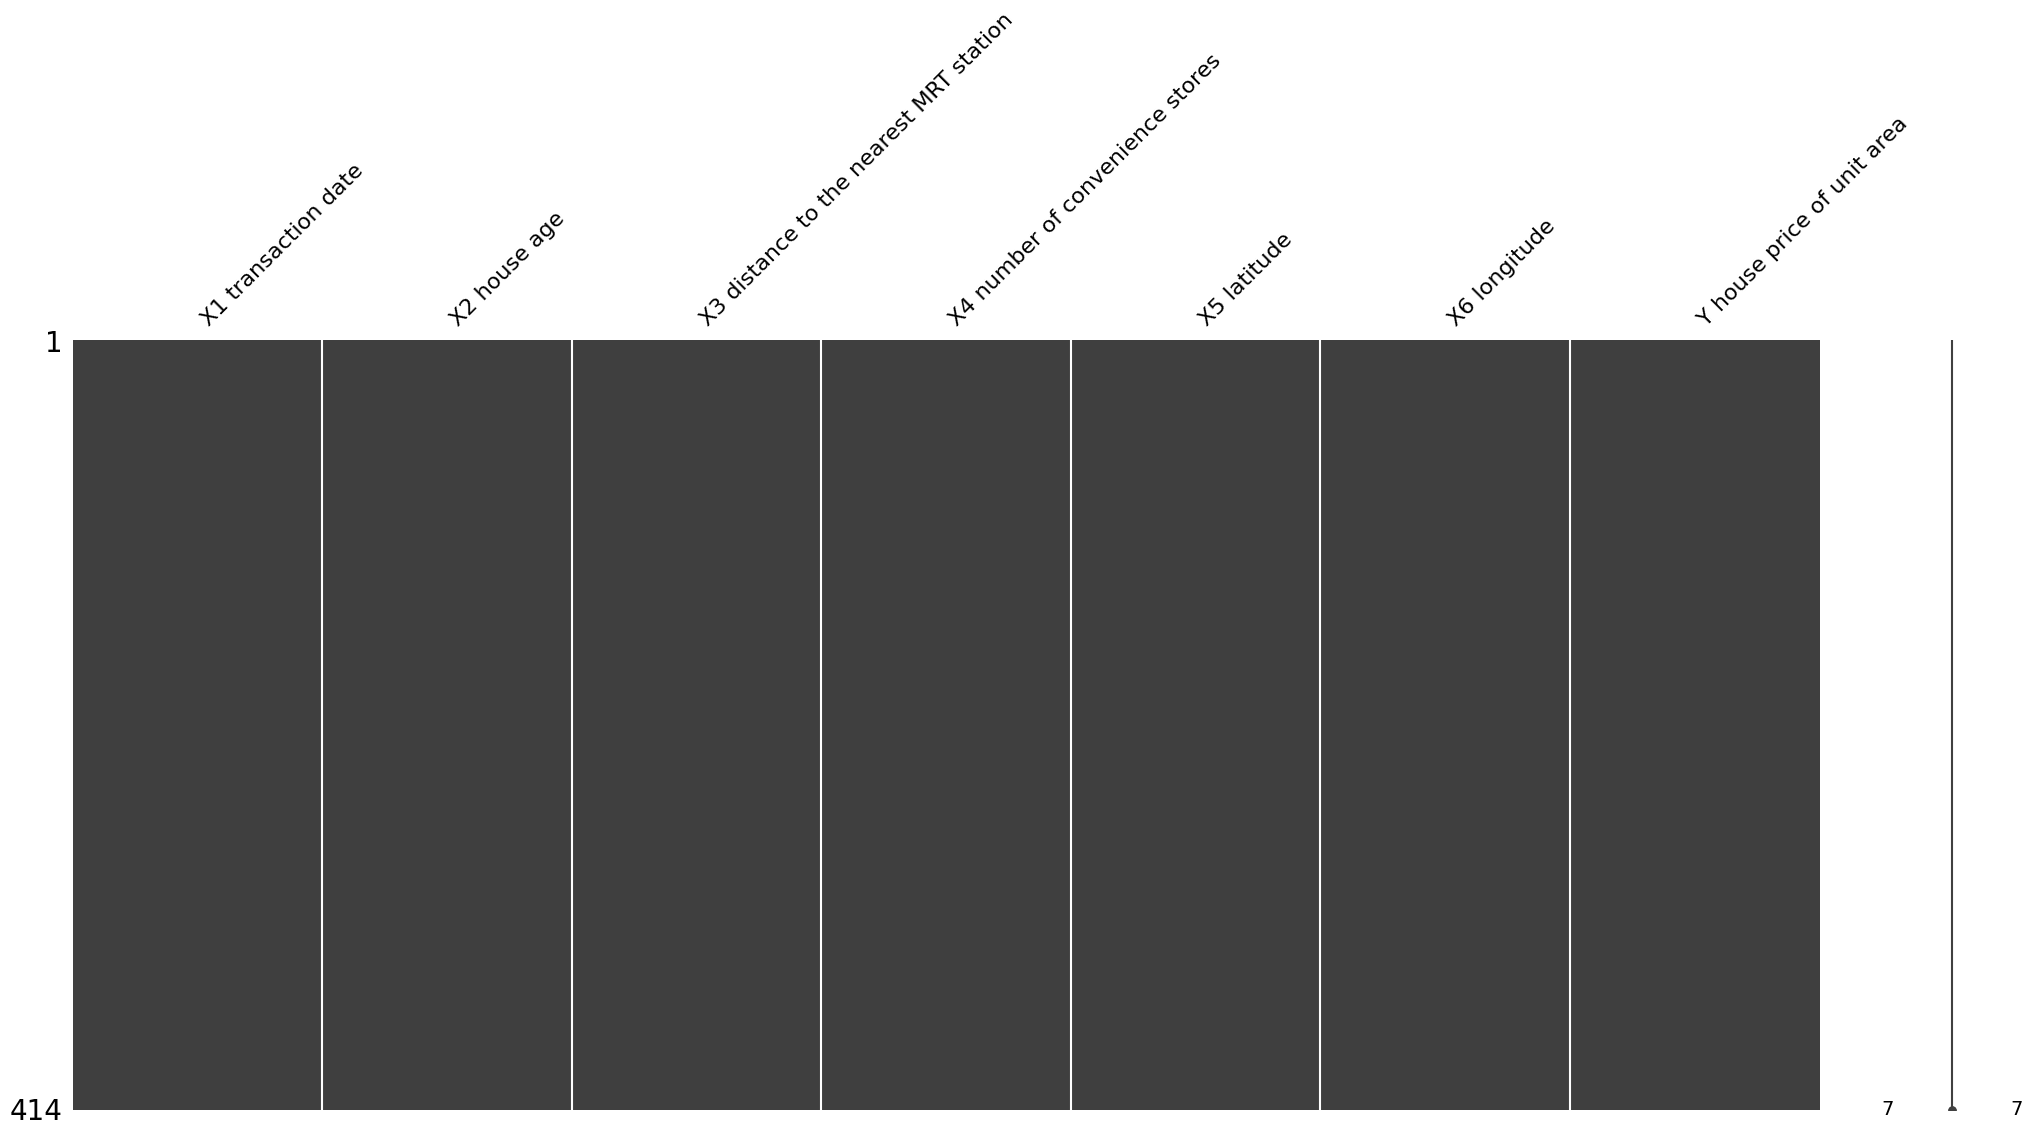

In [14]:
msno.matrix(df)

There are no missing values in the data

## Identifying Unique values in each column

In [15]:
# Unique values per column
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

X1 transaction date: 12 unique values
X2 house age: 236 unique values
X3 distance to the nearest MRT station: 259 unique values
X4 number of convenience stores: 11 unique values
X5 latitude: 234 unique values
X6 longitude: 232 unique values
Y house price of unit area: 270 unique values


## Inspect Target Variable

Y house price of unit area is the feature we have to predict based on the factors affecting the pricing i.e house age, distance to the nearest MRT station, number of convenience stores, latitude and longitude  

## Handle Duplicates

In [16]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


## Exploratory Data Analysis

Let's do a EDA with different graph plots to better understand the structure and relationship between the variables

#### 1. Histogram

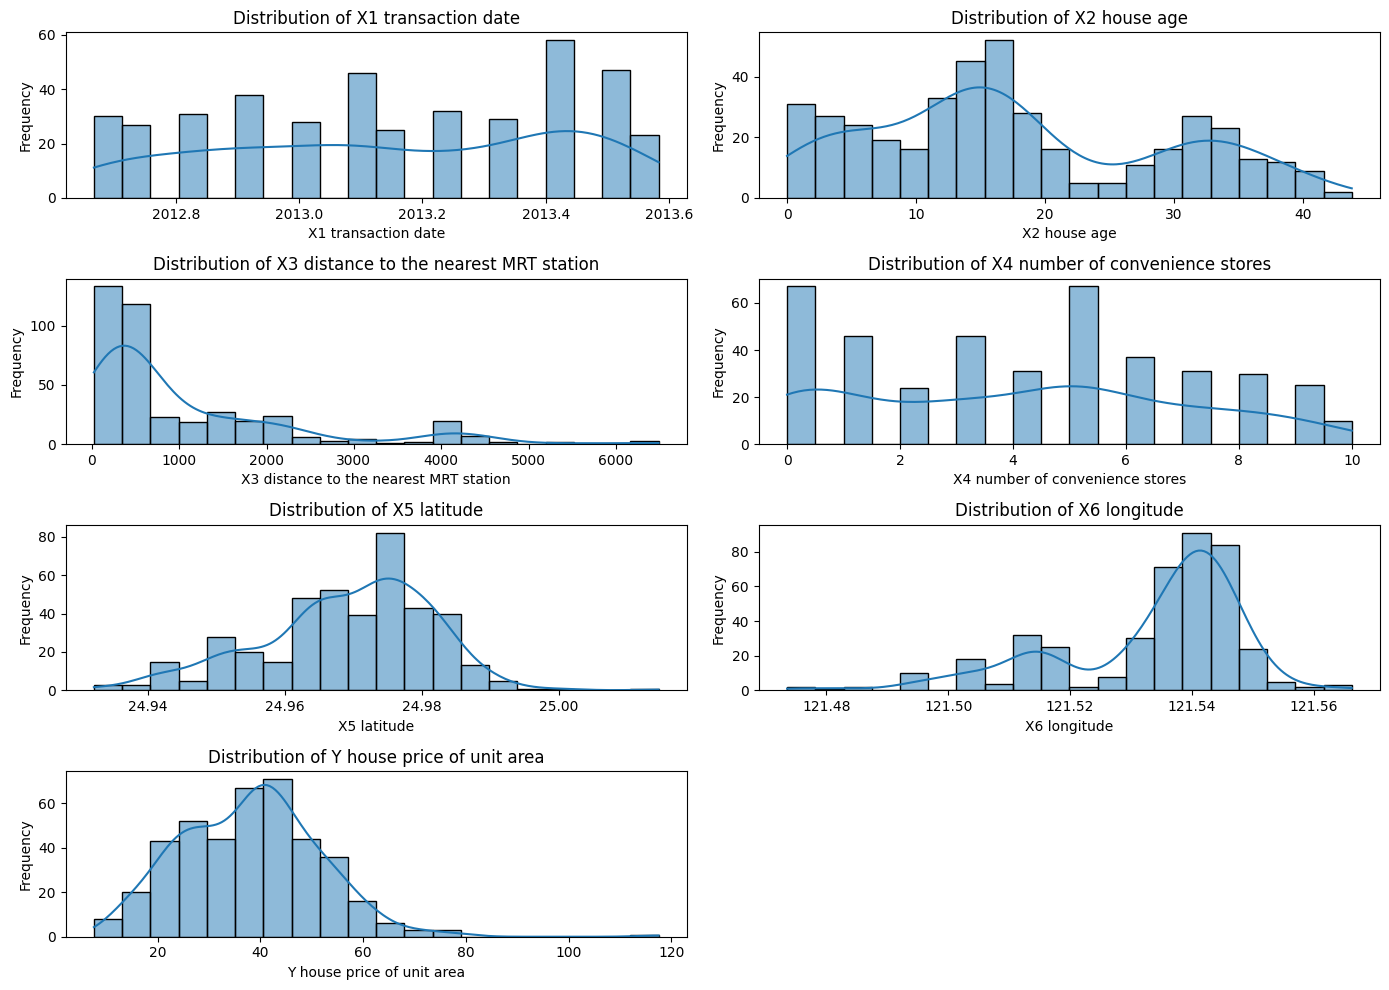

In [17]:
# Define the data columns
columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

# Number of columns for the grid
n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10), sharey=False)

# Flatten the axes array for easy iteration (if n_rows > 1)
axes = axes.ravel()

# Plot each histogram
for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide unused axes if the grid is larger than the number of columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for readability
plt.tight_layout()

# Show the combined plot
plt.show()


How do the geographical location, proximity to urban infrastructure (MRT stations and convenience stores), and house age influence the distribution and pricing of housing in the dataset?

* The tightly clustered/fairly symmetric distribution of latitude and longitude indicate the data is likely from a specific region or city
* The distribution of "distance to the nearest MRT station" is highly right-skewed, with most houses located very close to the MRT station (less than 1000 meters) and the distribution of "number of convenience stores" is positively skewed, with most houses having around 4-5 convenience stores nearby. Suggesting that most houses are clustered in urban or semi-urban areas
* The house age shows a bimodal distribution, with peaks around the ages of 10 and 30 years, indicates two distinct groups of housing stock, possibly related to construction booms
* The distribution of house prices is left-skewed, with a peak around 40-60 per unit area suggests that most houses are in the mid-range price category, with fewer high-priced houses above 100 per unit area

#### 2. Correlation Heatmap

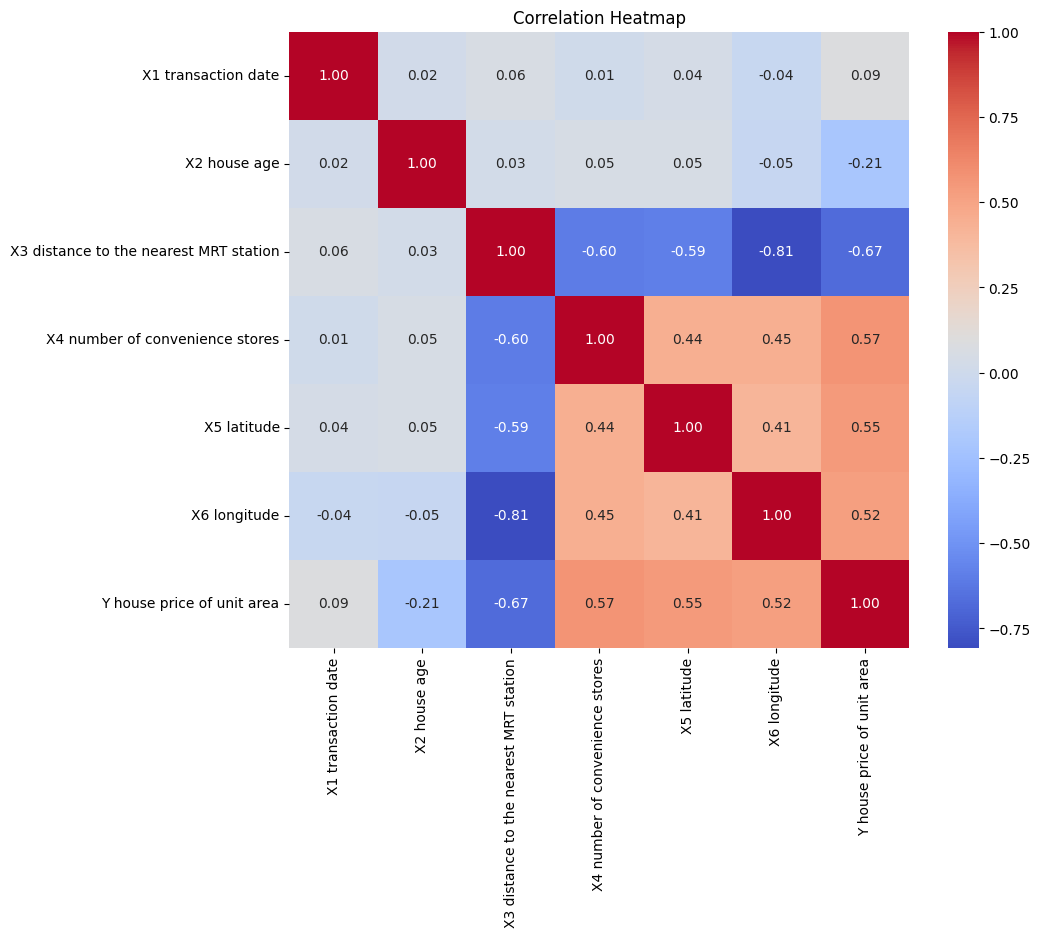

In [18]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

* Distance to the nearest MRT station and house pricing have a strong negative correlation, also number of concience stores and house pricing have a strong positive correlation. This implies houses closer to MRT stations and with more nearby convenience stores are priced higher, highlighting the importance of infrastructure
* The positive correlations among latitude, longitude, and urban infrastructure suggest that higher-priced properties are geographically clustered in urban areas
* House age has a weak negative relationship with price implying buyers prioritize location and infrastructure over property age

This heatmap suggests that housing prices are driven more by **location** and **accessibility** than by the age of the house or temporal factors like the transaction date.

#### 3. Scatterplots for Trends

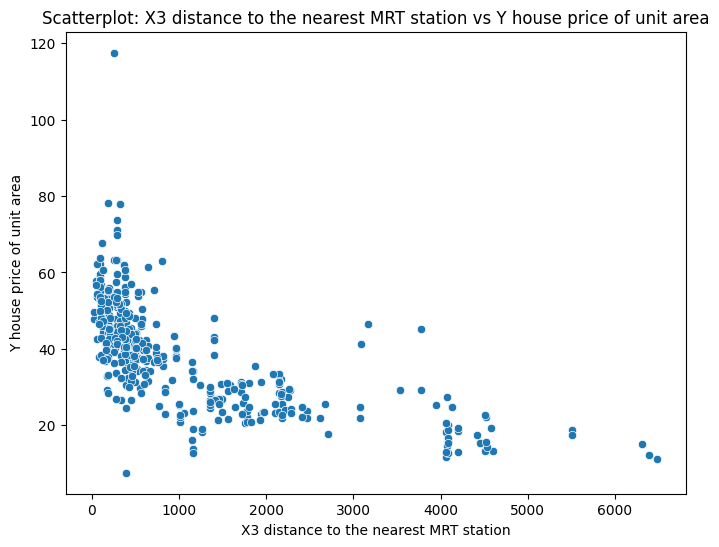

In [19]:
# Scatterplots
target = 'Y house price of unit area' 

feature1 = 'X3 distance to the nearest MRT station'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[feature1], y=df[target])
plt.title(f"Scatterplot: {feature1} vs {target}")
plt.xlabel(feature1)
plt.ylabel(target)
plt.show()


There is a clear negative trend: Houses located very close to MRT stations (<1000 meters) show higher prices, while houses farther away (>4000 meters) show significantly lower prices.<br>
*Proximity to public transportation (MRT stations) has a significant impact on house pricing, with closer houses being more valuable due to better accessibility*

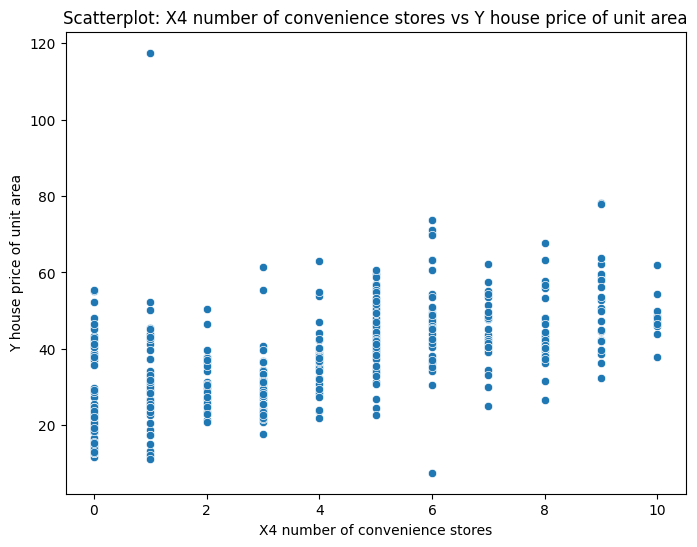

In [20]:
feature2 = 'X4 number of convenience stores'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[feature2], y=df[target])
plt.title(f"Scatterplot: {feature2} vs {target}")
plt.xlabel(feature2)
plt.ylabel(target)
plt.show()

There is a positive trend: Houses with 5-7 convenience stores nearby show higher prices, while those with fewer stores (0-2) tend to have lower prices <br>
*Urban infrastructure, such as convenience stores, adds value to housing, indicating a preference for properties located in well-serviced areas*

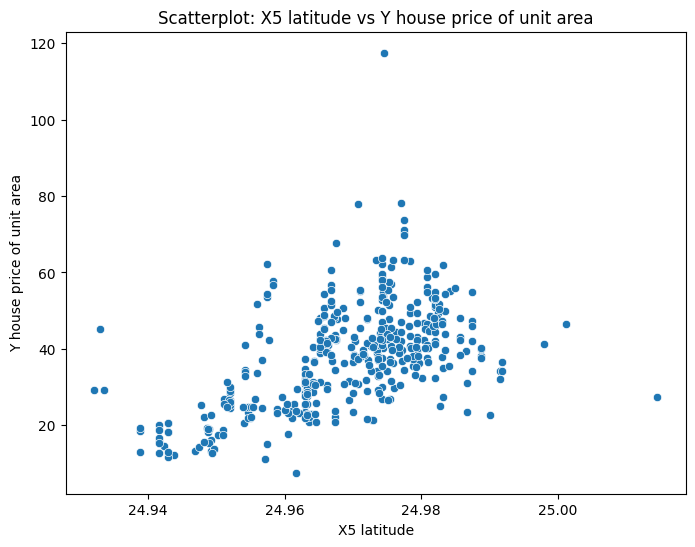

In [21]:
feature3 = 'X5 latitude'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[feature3], y=df[target])
plt.title(f"Scatterplot: {feature3} vs {target}")
plt.xlabel(feature3)
plt.ylabel(target)
plt.show()

There is a positive relationship: Houses in the middle range of latitudes (24.96 to 24.98) show higher clustering of high-priced properties <br>
*Higher-priced houses are geographically concentrated in certain latitude bands, possibly representing more desirable or developed neighborhoods within the region*

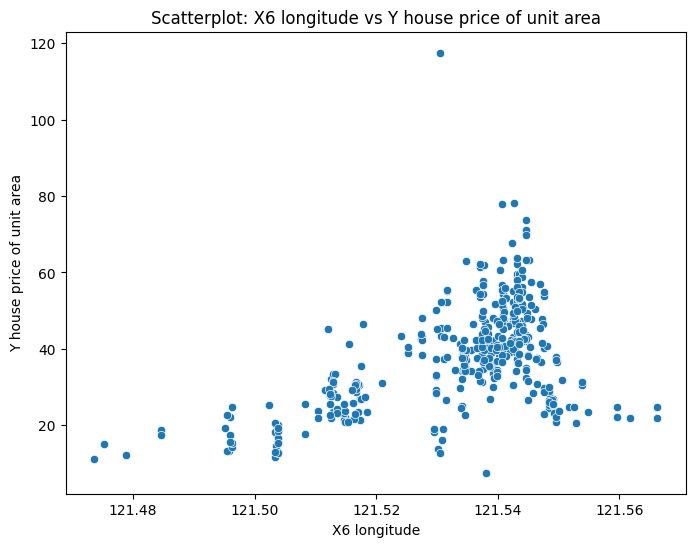

In [22]:
feature4 = 'X6 longitude'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[feature4], y=df[target])
plt.title(f"Scatterplot: {feature4} vs {target}")
plt.xlabel(feature4)
plt.ylabel(target)
plt.show()

There is a positive trend: Most high-priced properties are concentrated within a specific range of longitudes, with fewer high-priced properties at the lower end of the range (121.48-121.50) <br>
*House prices are geographically influenced by longitude, likely reflecting specific urban zones or neighborhoods with higher desirability*

#### 4. Boxplot for Outliers

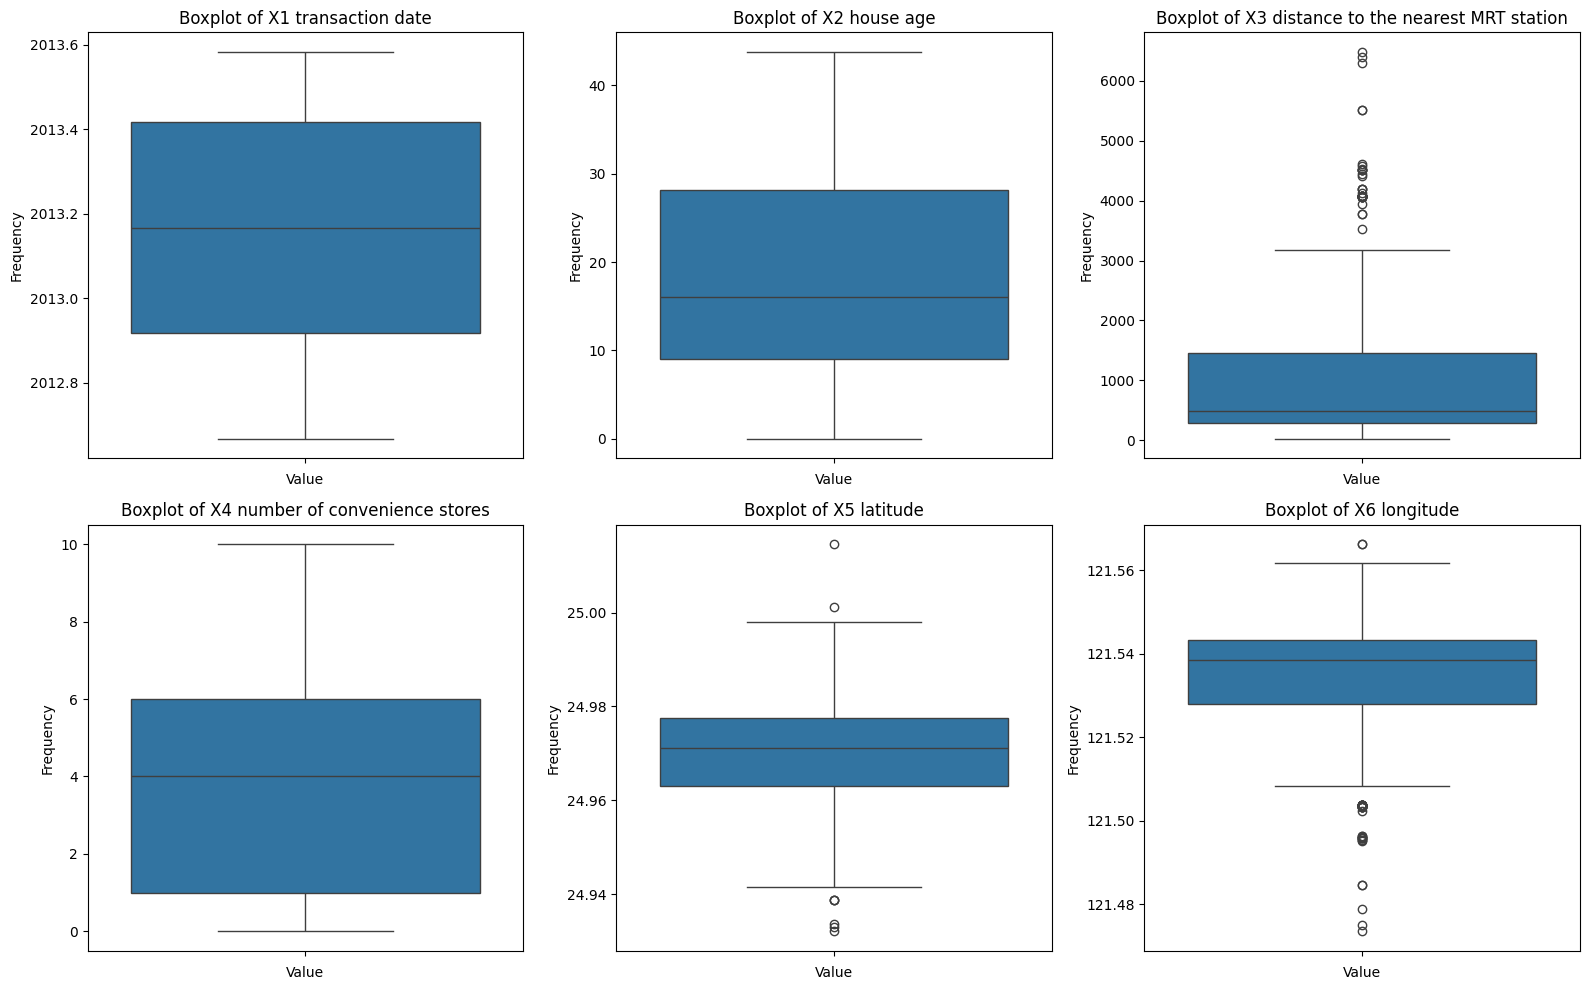

In [23]:
# Boxplots for numerical features
numerical_columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

## Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Adjust grid size (2 rows, 3 columns)

# Iterate over each column and its corresponding subplot axis
for col, ax in zip(numerical_columns, axes.flatten()):
    sns.boxplot(data=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}", fontsize=12)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout for readability
plt.tight_layout()
plt.show()

For distance to the nearest MRT station data shows a large range with multiple significant outliers on the higher end. <br>
The distribution for latitude and longitude is very narrow with a few outliers. 

#### 5. Pairplot

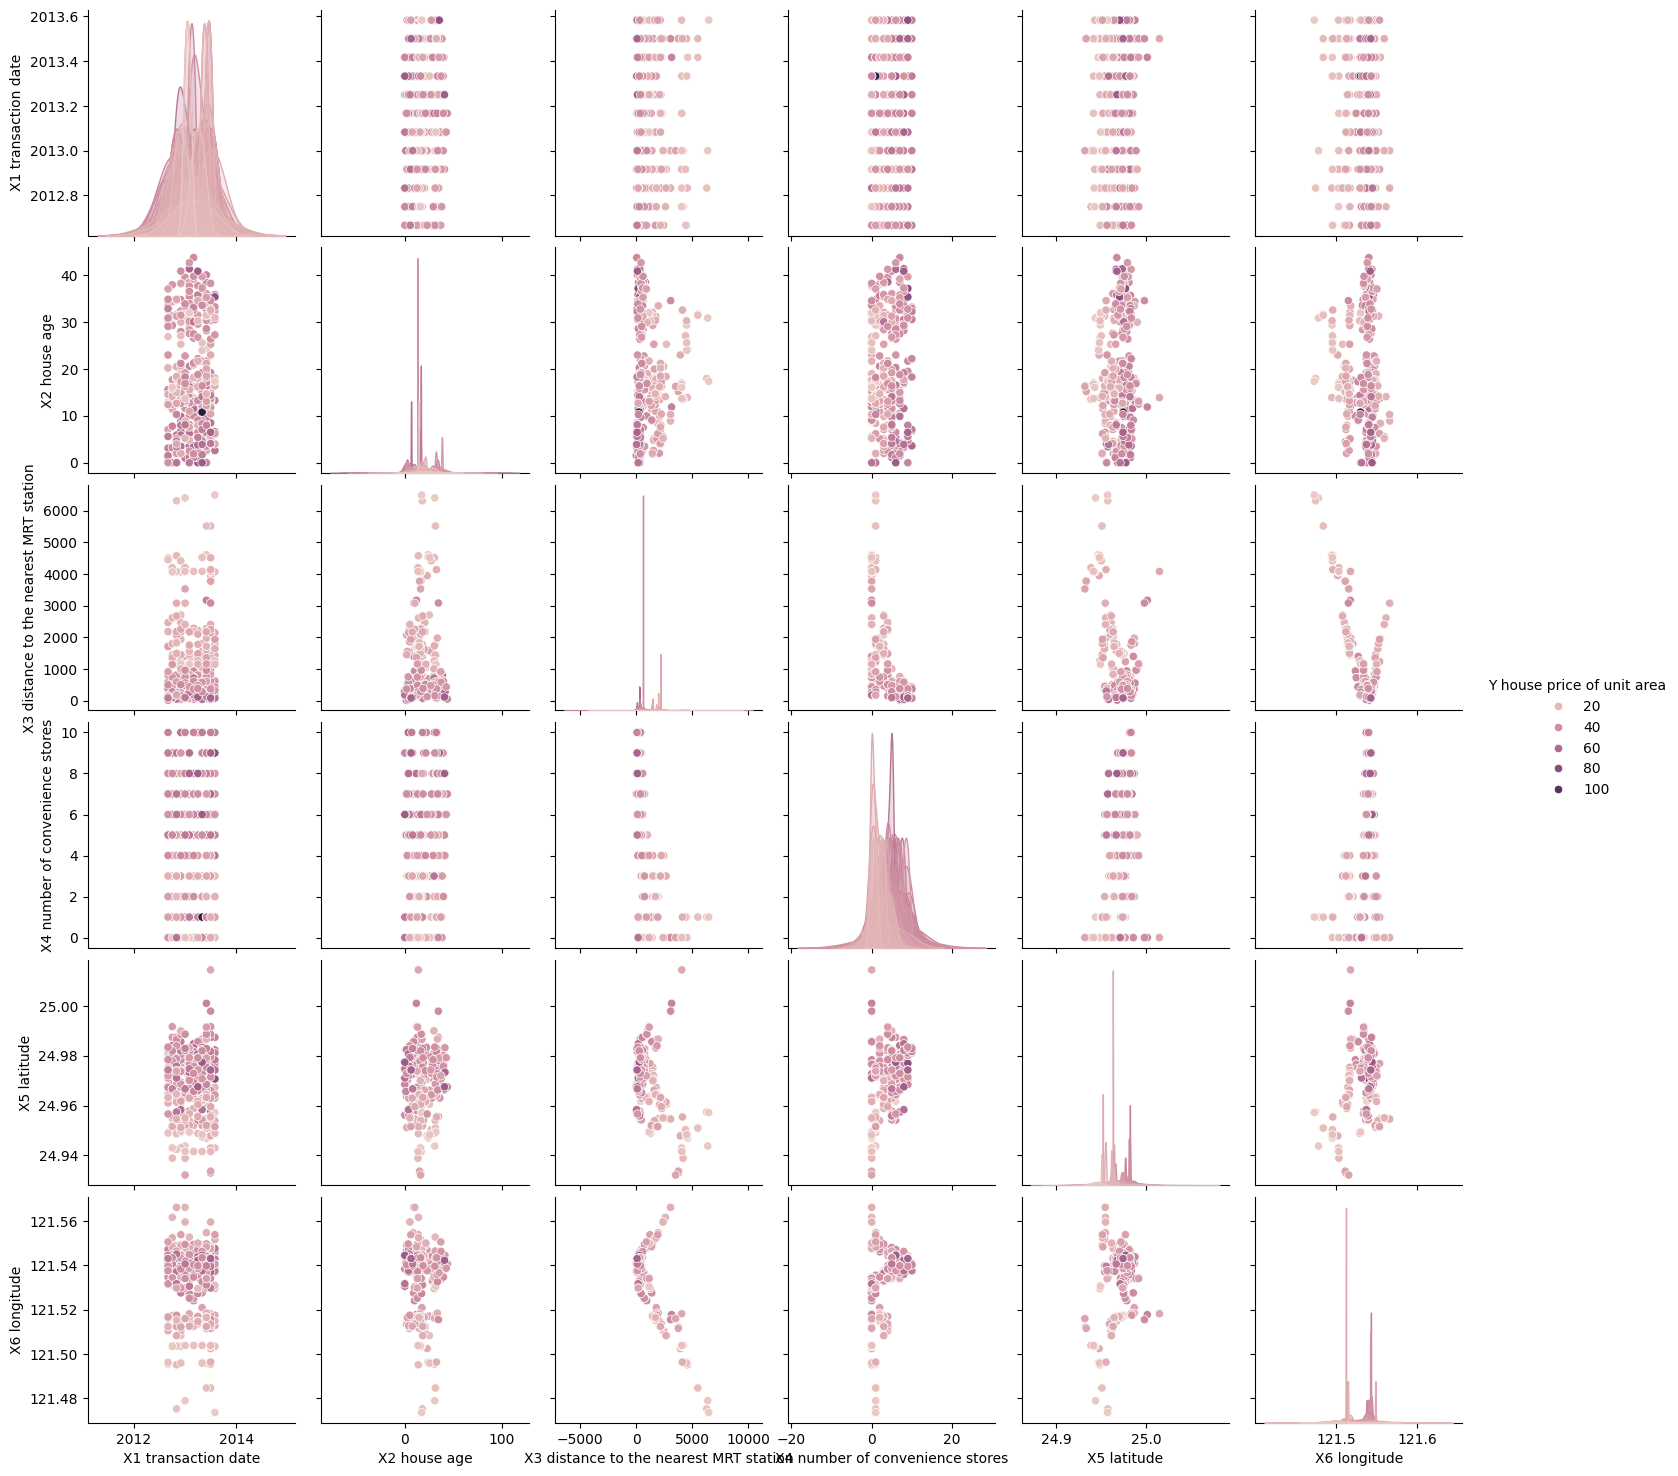

In [24]:
# Pair plot to explore pairwise relationships
sns.pairplot(df, diag_kind='kde', hue='Y house price of unit area')  # Use `hue='categorical_column'` for colored categories
plt.show()

Distance to MRT stations (X3) and the number of convenience stores (X4) are key factors influencing house prices having a strong negative and positive relationship<br>
Latitude (X5) and longitude (X6) have weak positive correlations with price, indicating regional clustering but not as strongly as infrastructure-related features<br>
House age and transaction dates are less influential in determining property prices

In [25]:
# saving a copy of dataset with outliers
df_with_outliers = df.copy()

## Handling Outliers

#### Interquartile Range (IQR) Method

IQR is used to measure variability by dividing a data set into quartiles and identifies outliers by analyzing the spread of the middle 50% of the data (between the 25th percentile and 75th percentile)

* IQR = Q3−Q1, where Q1 is the 25th percentile and Q3 is the 75th percentile
* Lower bound: Q1 − 1.5 × IQR
* Upper bound: Q3 + 1.5 × IQR
* Any data point outside these below lower bound and above upper bound is considered an outlier and are excluded

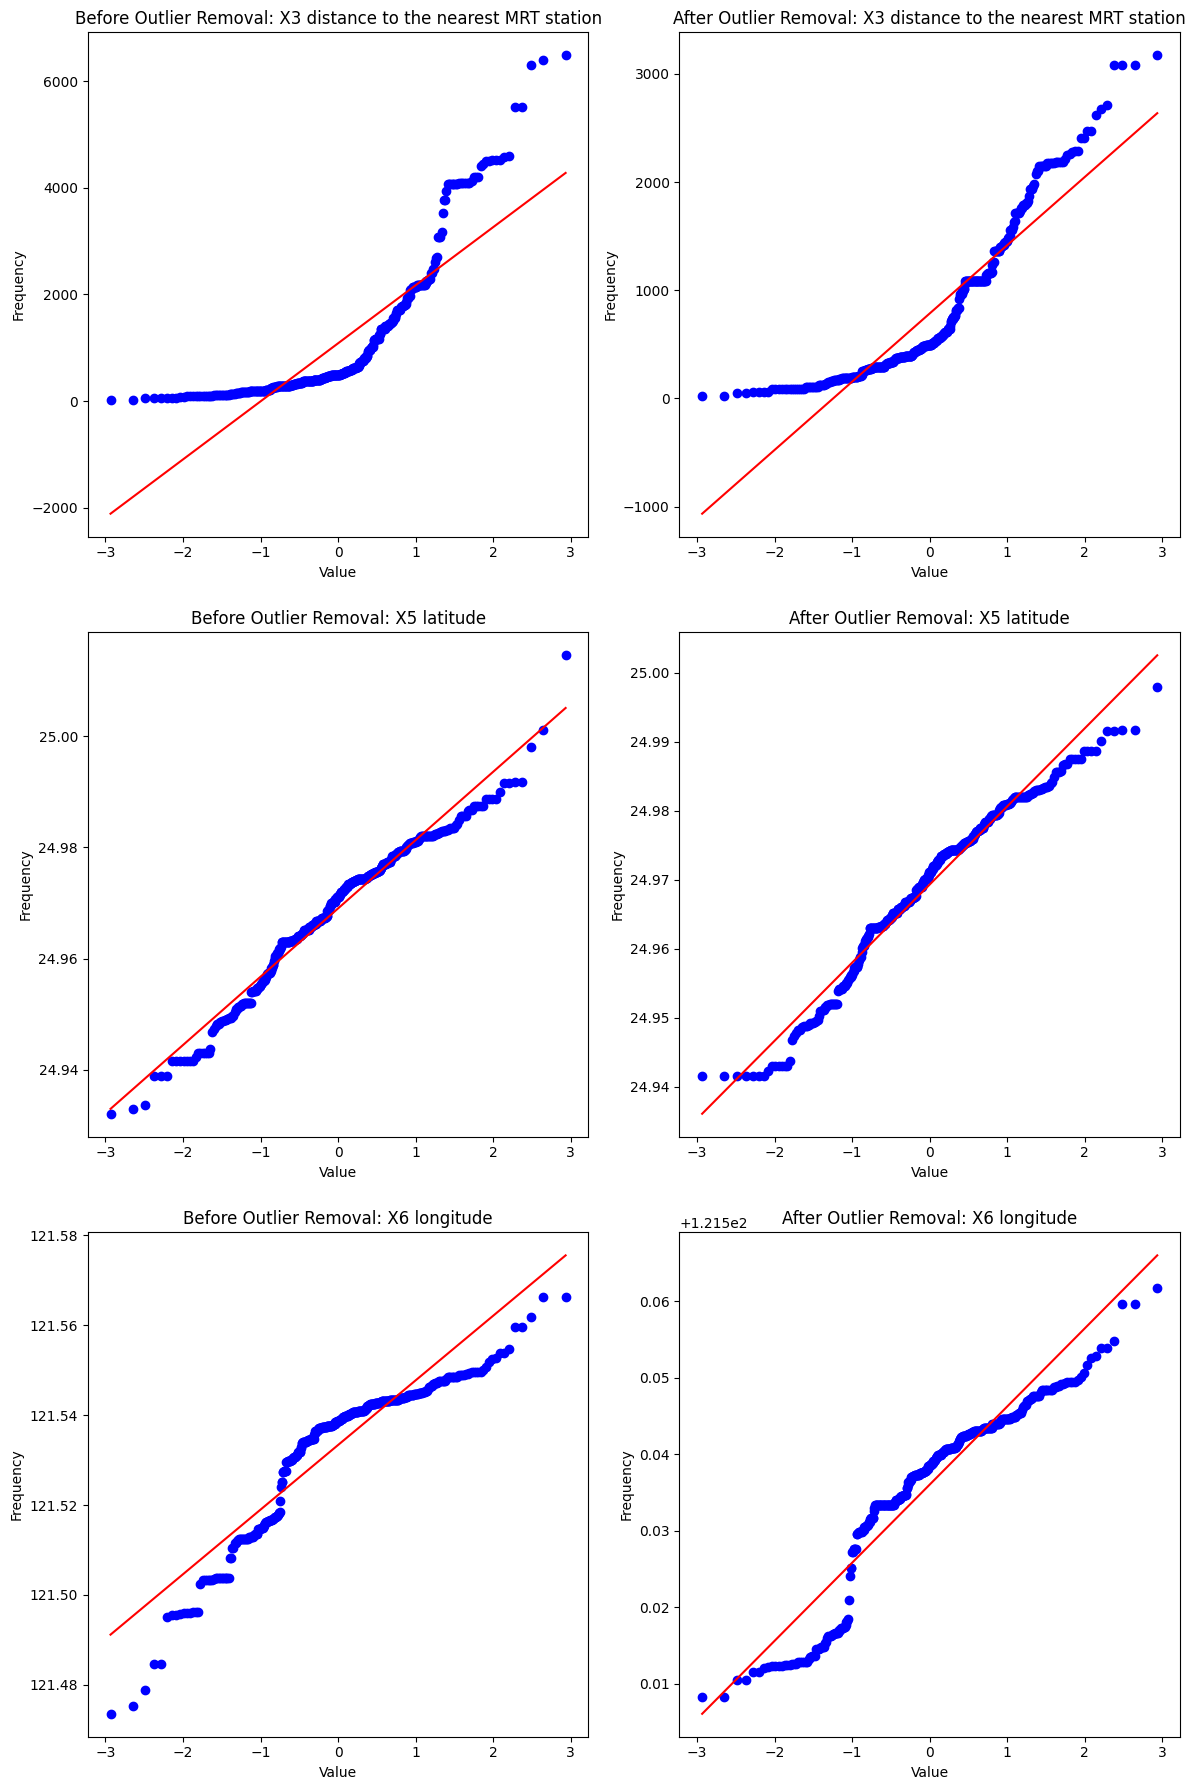

In [26]:
# Columns with outliers
columns_with_outliers = ['X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']

# Create subplots
fig, axes = plt.subplots(len(columns_with_outliers), 2, figsize=(12, 6 * len(columns_with_outliers)))

# Iterate through columns and create QQ plots
for idx, column in enumerate(columns_with_outliers):
    # QQ plot before removal
    stats.probplot(df[column], dist="norm", plot=axes[idx, 0])
    axes[idx, 0].set_title(f"Before Outlier Removal: {column}")
    axes[idx, 0].set_xlabel("Value")
    axes[idx, 0].set_ylabel("Frequency")
    
    # Apply outlier removal
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Impute outliers with the mean
    mean_value = df[column].mean()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    
    # QQ plot after removal
    stats.probplot(df[column], dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f"After Outlier Removal: {column}")
    axes[idx, 1].set_xlabel("Value")
    axes[idx, 1].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

Diagram shows the points are more closer to the red line, indicating extreme outliers are been removed

In [27]:
# Columns with outliers
columns_with_outliers = ['X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']

# Summary statistics before handling outliers
summary_before = df_with_outliers[columns_with_outliers].describe()

# Summary statistics after handling outliers
summary_after = df[columns_with_outliers].describe()

# Combine and display the comparison
summary_comparison = pd.concat([summary_before, summary_after], axis=1, keys=['Before Imputation', 'After Imputation'])
print(summary_comparison)

                           Before Imputation                           \
      X3 distance to the nearest MRT station X5 latitude X6 longitude   
count                             414.000000  414.000000   414.000000   
mean                             1083.885689   24.969030   121.533361   
std                              1262.109595    0.012410     0.015347   
min                                23.382840   24.932070   121.473530   
25%                               289.324800   24.963000   121.528085   
50%                               492.231300   24.971100   121.538630   
75%                              1454.279000   24.977455   121.543305   
max                              6488.021000   25.014590   121.566270   

                            After Imputation                           
      X3 distance to the nearest MRT station X5 latitude X6 longitude  
count                             414.000000  414.000000   414.000000  
mean                              785.271671   24.969

From the summary stats we can see that there is a significant change in min and max for "X3 distance to the nearest MRT station", as it had the most extreme outliers

## Feature Scaling

Are all the necessary features help predict the house price in same range?

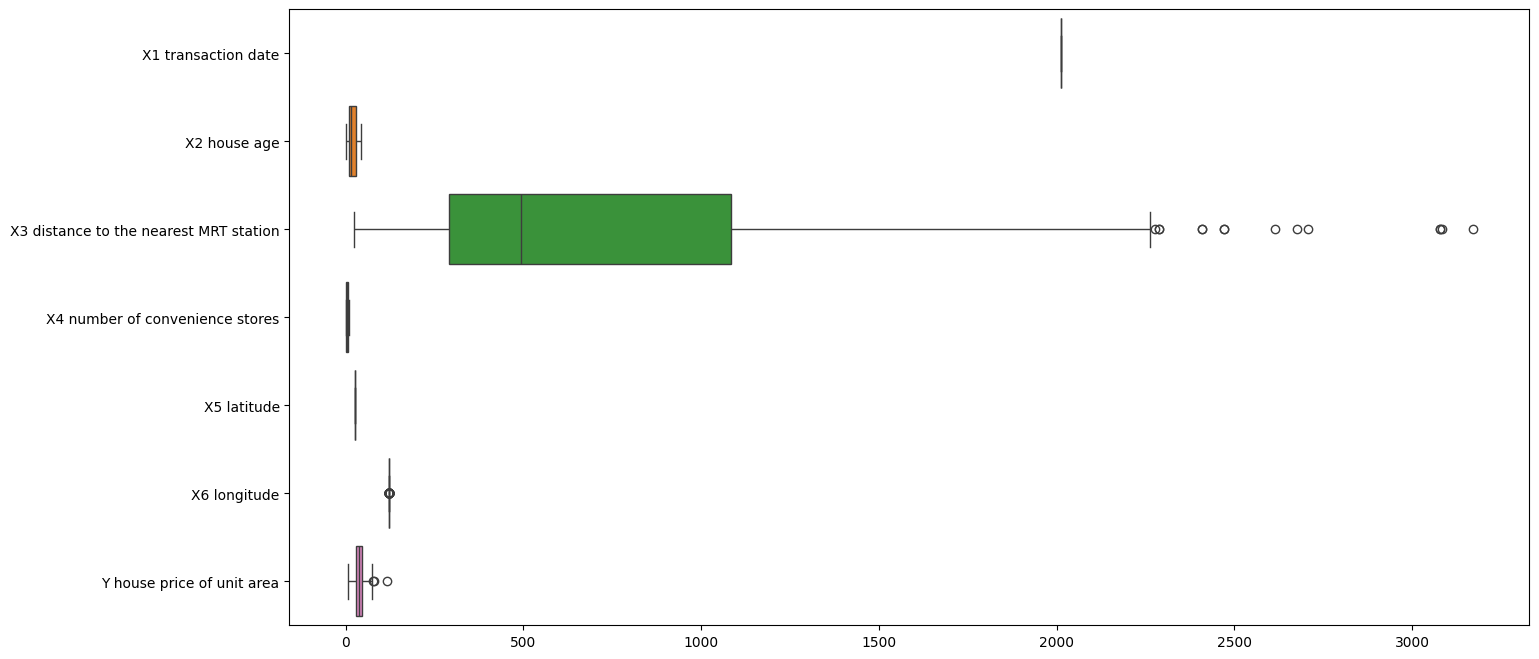

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(data = df, orient='h')
plt.show()

From the above diagram it clearly shows that all the predictors are not in same range. Therefore, it is advisible to convert these features into one scale for better modeling

#### Common methods for Feature Scaling:
* Standardization (Z-score Normalization)
    * Centers data around 0 with a standard deviation of 1. Preferred for algorithms that assume data is normally distributed or sensitive to scale
* Min - Max Scaling (Normalization)
    * Scales data to a fixed range, typically [0, 1] and are sensitive to outliers. For models requiring a bounded range or when the range of features is important like in kNN or Neutral Networks
* Robust Scaling
    * Centers data using the median instead of the mean and are resistant to outliers. Works well for most machine learning models, particularly when the distribution is skewed

In [29]:
#Min-Max Scaler for feature scaling

def feature_scaling(df):  # Function to scale all the features
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled_df = scaler.transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    return scaled_df

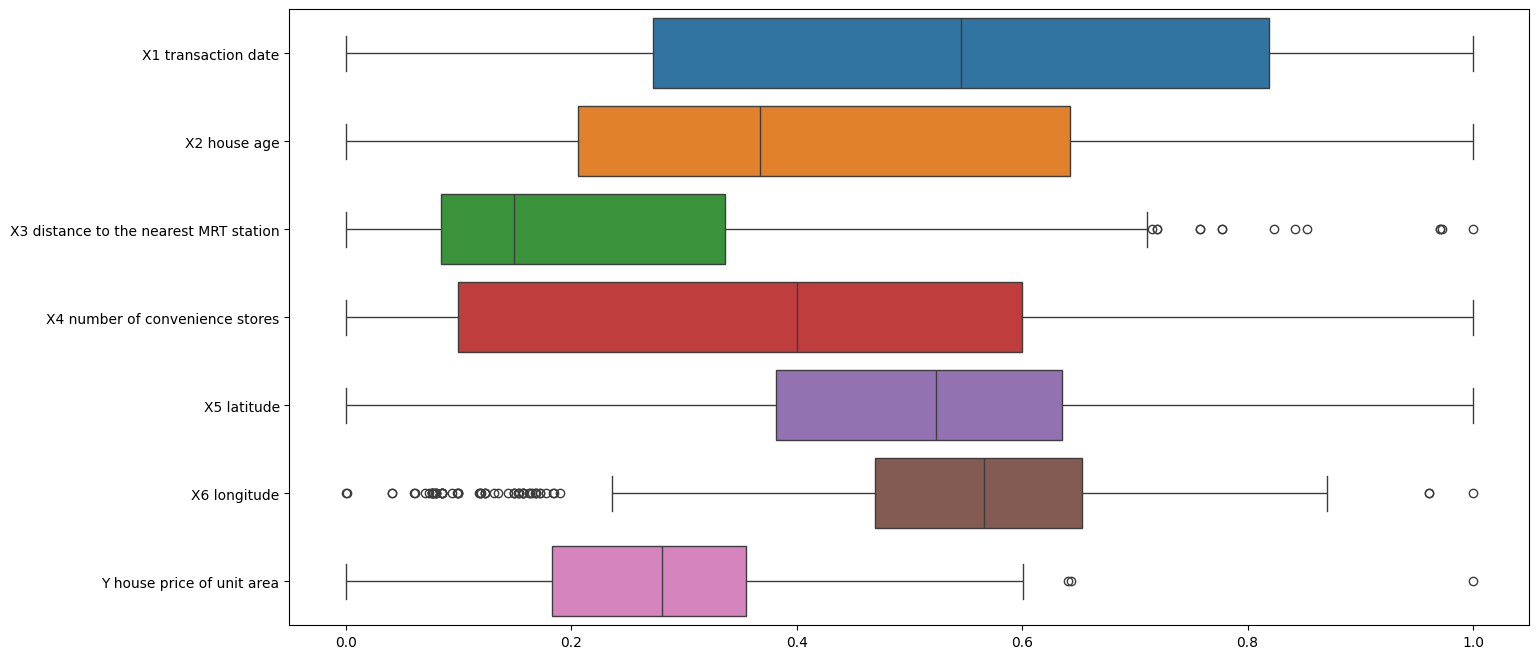

In [30]:
df_scaled = feature_scaling(df)
plt.figure(figsize=(16,8))
sns.boxplot(data = df_scaled, orient='h')
plt.show()

Now all the features are in same scale

## Feature Selection

One of the crucial step in the machine learning pipeline where we choose the most important or relevant features for training a model. Increases the accuracy and generalizability of the model by focusing on meaningful predictors.

#### Ordinary Least Squares
OLS helps determine which features are statistically significant in predicting the target variable which is based on their p-values<br>
Features with high p-values "p > 0.05" are less likely to contribute to the model and can potentially be dropped

In [31]:
# Define predictors (X) and target (y)
X = df_scaled[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df_scaled['Y house price of unit area']

# Add a constant for OLS
X_ols = sm.add_constant(X)

# Fit OLS model
ols_model = sm.OLS(y, X_ols).fit()

# Display OLS summary
print(ols_model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.617
Model:                                    OLS   Adj. R-squared:                  0.611
Method:                         Least Squares   F-statistic:                     109.2
Date:                        Fri, 06 Dec 2024   Prob (F-statistic):           1.27e-81
Time:                                21:34:20   Log-Likelihood:                 476.54
No. Observations:                         414   AIC:                            -939.1
Df Residuals:                             407   BIC:                            -910.9
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

From the above results we can note that:
* X1 transaction date has p = 0.001 which is less than 0.05, hence a significant feature
* X2 house age has p = 0.001 which is less than 0.05, hence a significant feature
* X3 distance to the nearest MRT station has p = 0.001 which is less than 0.05, hence a significant feature
* X4 number of convenience stores p = 0.001 which is less than 0.05, hence a significant feature
* X5 latitude has p = 0.001 which is less than 0.05, hence a significant feature
* X6 longitude has p = 0.544 which is greater than 0.05, hence a non-significant feature

As "X6 longitude" feature does not significantly contribute to predicting the target variable, it can be dropped

In [32]:
# Drop the non-significant feature
X = X.drop(columns=['X6 longitude'])

# Re-run OLS
X_ols = sm.add_constant(X)
ols_model = sm.OLS(y, X_ols).fit()
print(ols_model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.617
Model:                                    OLS   Adj. R-squared:                  0.612
Method:                         Least Squares   F-statistic:                     131.2
Date:                        Fri, 06 Dec 2024   Prob (F-statistic):           1.27e-82
Time:                                21:34:38   Log-Likelihood:                 476.35
No. Observations:                         414   AIC:                            -940.7
Df Residuals:                             408   BIC:                            -916.5
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

#### Variance Inflation Factor

Variance Inflation Factor (VIF) measures the degree of multicollinearity (correlation) between independent variables in a regression model. Multicollinearity can distort regression estimates, making it difficult to interpret the coefficients accurately<br>

To ensure the remaining features after dropping X6 longitude, are independent enough to avoid multicollinearity issues

Interpretation of VIF:
* VIF = 1: No multicollinearity exists.
* VIF > 1 and ≤ 5: Moderate multicollinearity (acceptable).
* VIF > 5: High multicollinearity, which could affect the reliability of regression coefficients.
* VIF > 10: Severe multicollinearity; the model needs correction (e.g., by removing variables or using regularization techniques)

In [33]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_ols.columns
vif_data["VIF"] = [variance_inflation_factor(X_ols.values, i) for i in range(X_ols.shape[1])]
print(vif_data)

                                  Feature        VIF
0                                   const  18.182422
1                     X1 transaction date   1.007123
2                            X2 house age   1.005249
3  X3 distance to the nearest MRT station   1.487703
4         X4 number of convenience stores   1.609029
5                             X5 latitude   1.281142


The const represents the intercept in the regression model. A high VIF for const is expected and normal because it is not a predictor but part of the model.<br>
Rest all features have a VIF < 5, indicating independent variables

## Modeling

Let's start by splitting the dataset into train and test<br>
* The training dataset is used to teach the model how to make predictions
* The test dataset simulates unseen or real-world data, helps to determine the generalization ability of the model—whether it works well on new data, not just the data it was trained on

In [34]:
# # Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Exploratory data analysis (EDA), including the correlation heatmap, showed both positive and negative relationships between features (e.g., X3 distance to the nearest MRT station and X4 number of convenience stores) and the target variable "Y house price of unit area".<br>
And the target variable is continuous, so will go with Linear Regression for modeling<br>
Linear Regression provides coefficients for each feature, which can be directly interpreted as the magnitude and direction of their influence on the target variable

In [35]:
# Train the Linear Regression Model
# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# After training, use the model to predict house prices on both the training and testing datasets
# Predictions on train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

## Evaluating Model Performance

It is important to perform evaluation after modeling to ensure the model is accurately capturing the relationship between the input features and the target variable.<br>
To check the model is reliable and generalizes well to unseen data, avoiding overfitting and underfitting.

#### Common ways:
1. Residual Analysis
    * Residuals (𝑦 − 𝑦^) are the differences between actual and predicted values
2. R-Squared
    * Measures the proportion of the variance in the target variable that is explained by the independent variables
3. Adjusted R-Squared
    * Accounts for the number of predictors in the model, penalizing for adding unnecessary variables
    * More reliable than R-Squared especially for models with many predictors
4. Mean Absolute Error (MAE)
    * Measures the average magnitude of errors, ignoring their direction
    * Lower MAE indicates better model performance
5. Mean Squared Error (MSE)
    * Penalizes larger errors more heavily than smaller errors; Used to understand the average squared error
6. Root Mean Squared Error (RMSE)
    * The square root of MSE, providing error in the same units as the target variable
    * RMSE is more sensitive to outliers than MAE
7. Mean Absolute Percentage Error (MAPE)
    * Measures prediction error as a percentage, useful for comparing models across datasets with different scales

In [37]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print("Model Performance for Linear Regression:")
print('Train Set:')
print('Mean Absolute Error (MAE):', mean_absolute_error(y_train, y_train_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R² Score:', r2_score(y_train, y_train_pred))
print('Test Set:')
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('R² Score:', r2)

Model Performance for Linear Regression:
Train Set:
Mean Absolute Error (MAE): 0.05335932570242881
Root Mean Squared Error (RMSE): 0.07916883596344843
R² Score: 0.5975267347443216
Test Set:
Mean Absolute Error (MAE): 0.04487536052846161
Root Mean Squared Error (RMSE): 0.0652850719817641
R² Score: 0.6931434461751476


#### Observation so far

1. MAE 
    * MAE is 0.048 on average, the model's predictions are off by 0.0448 units from the actual target values
    * Lower MAE indicates better performance, hence model is performing reasonably well in terms of absolute error
2. RMSE
    * The RMSE is 0.0653, meaning the model's typical prediction error is around this value in the same units as the target variable
    * Lower RMSE indicates better model performance
    * The RMSE being slightly higher than the MAE suggests there might be a few larger prediction errors, though they are not significant
3. R-Squared
    * A score of 0.693 means that approximately 69.3% of the variance in the target variable is explained by the model.
    * It indicates that the model captures a significant portion of the variability in the data but has room for improvement

                                  Feature  Coefficient
4                             X5 latitude     0.207121
3         X4 number of convenience stores     0.086415
0                     X1 transaction date     0.045556
1                            X2 house age    -0.127247
2  X3 distance to the nearest MRT station    -0.224008


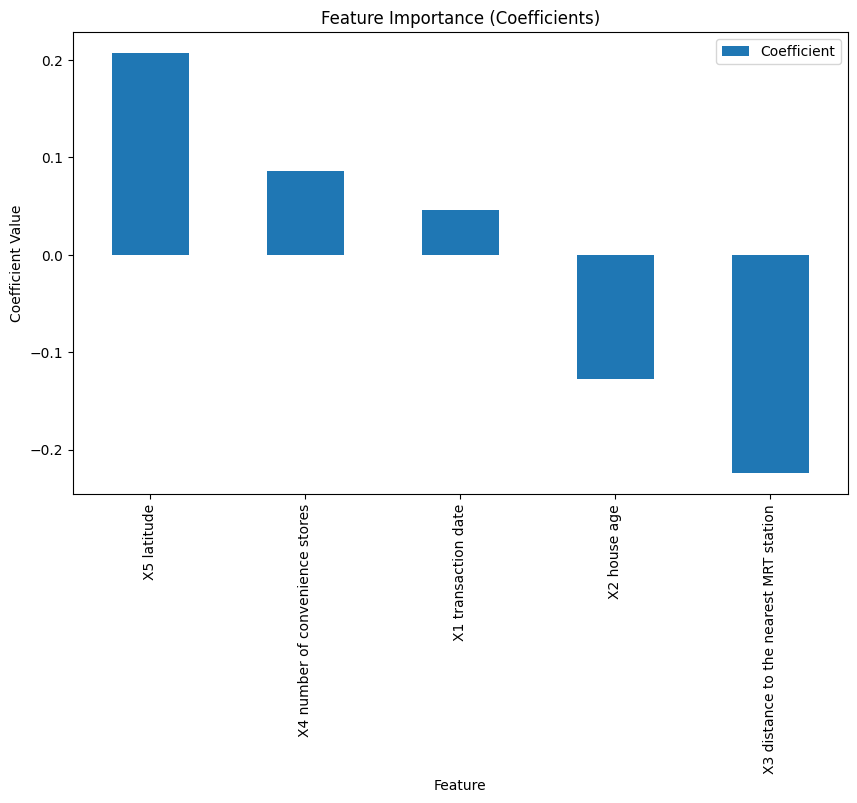

In [38]:
# Create a DataFrame for coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

# Visualize coefficients
coefficients.set_index('Feature').plot(kind='bar', figsize=(10, 6), title="Feature Importance (Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()

#### Observations

1. Latitude (X5 latitude):
    * The most significant positive feature, showing that houses located further north are priced higher
2. Distance to MRT Station (X3 distance to the nearest MRT station):
    * Strong negative coefficient, highlighting that proximity to MRT stations is a key determinant of higher house prices
3. Number of Convenience Stores (X4 number of convenience stores):
    * Positive coefficient, indicating that better infrastructure around a house increases its price
4. Transaction Date (X1 transaction date):
    * Positive but weaker impact, suggesting temporal factors are less significant compared to geographic and infrastructure-related features
5. House Age (X2 house age):
    * Negative coefficient, meaning older houses tend to have lower prices. However, the impact is relatively modest compared to location-based features

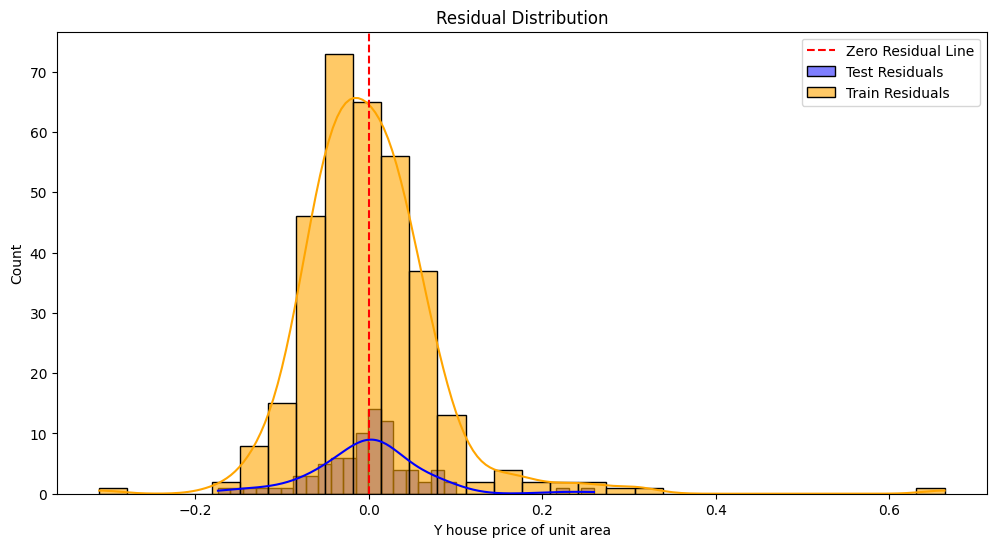

In [39]:
# Calculate residuals
residuals_test = y_test - y_test_pred
residuals_train = y_train - y_train_pred

# Plot residual distribution
plt.figure(figsize=(12, 6))
sns.histplot(residuals_test, kde=True, bins=30, color='blue', label='Test Residuals')
sns.histplot(residuals_train, kde=True, bins=30, color='orange', label='Train Residuals', alpha=0.6)
plt.axvline(0, color="red", linestyle="--", label="Zero Residual Line")
plt.title("Residual Distribution")
plt.legend()
plt.show()

#### Observations from the Residual Analysis:
1. Residual Distribution:
    * Both train and test residuals appear to follow a roughly normal distribution centered around zero, which is a good indication
2. Bias Check:
    * The residuals are symmetric around zero (red dashed line), indicating that there is no significant bias in the model's predictions
3. Consistency Between Train and Test:
    * Train and test residuals overlap well, suggesting the model generalizes reasonably to unseen data
    * There is no evidence of overfitting or underfitting.

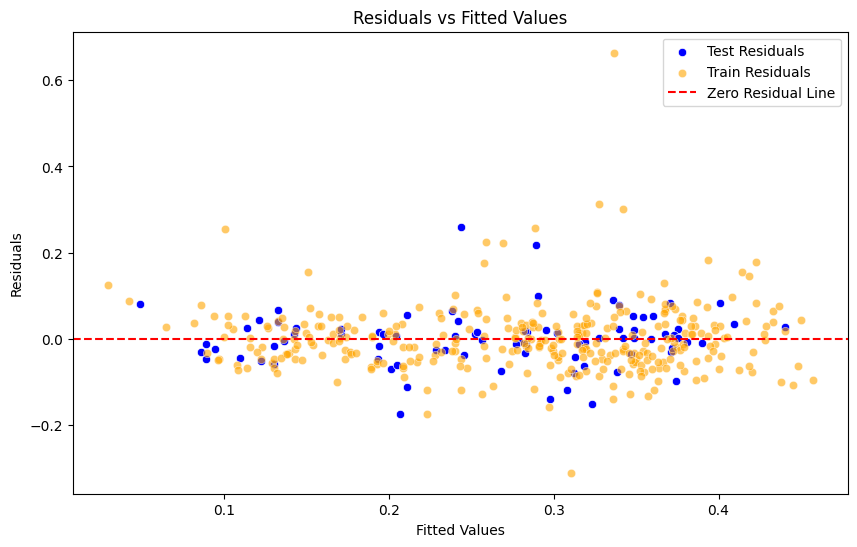

In [40]:
# Residuals vs Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals_test, color='blue', label='Test Residuals')
sns.scatterplot(x=y_train_pred, y=residuals_train, color='orange', label='Train Residuals', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

#### Observations

1. Random Distribution Around Zero
    * The residuals (both test and train) are randomly scattered around the horizontal line y=0 (red dashed line).
    * Hence, there are no clear patterns or trends in the residuals, suggesting that the assumption of linearity between the predictors and the target is reasonable.
2. Consistent Variance (Homoscedasticity)
    * The residuals maintain a roughly constant spread across the range of fitted values.
    * So, the assumption of homoscedasticity (constant variance of errors) holds true.
3. Similar Distribution for Train and Test Residuals
    * The residuals for both the train (orange) and test (blue) data follow a similar pattern, centered around zero.
    * Hence, the model is performing consistently on both training and test datasets.
4. Presence of Some Outliers
    * There are a few points with residuals farther from zero, particularly on the higher side of the fitted values, represent outliers or cases where the model struggles to predict accurately
    * While outliers exist, they are relatively few and not extreme, suggesting the model is robust.

#### Non-linear model for evaluating performance more better

As there is a room for improvement from the evaluation results of linear regression model, we will try for a non-linear model i.e Random Forest for more better performance

In [41]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Train the model

RandomForestRegressor(random_state=42)

In [42]:
# Make predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


In [43]:
# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_rf = r2_score(y_test, y_test_pred_rf)

print("Model Performance for Random Forest:")
print('Train Set:')
print("Mean Absolute Error (MAE):", mean_absolute_error(y_train, y_train_pred_rf))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("R² Score:", r2_score(y_train, y_train_pred_rf))
print('Test Set:')
print("Mean Absolute Error (MAE):", mae_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R² Score:", r2_rf)


Model Performance for Random Forest:
Train Set:
Mean Absolute Error (MAE): 0.01764405066585296
Root Mean Squared Error (RMSE): 0.02761504545049132
R² Score: 0.951031134450738
Test Set:
Mean Absolute Error (MAE): 0.03599908520950649
Root Mean Squared Error (RMSE): 0.052400464522655746
R² Score: 0.8023130947390313


In [44]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                                  Feature  Importance
2  X3 distance to the nearest MRT station    0.572049
1                            X2 house age    0.190146
4                             X5 latitude    0.146698
0                     X1 transaction date    0.051742
3         X4 number of convenience stores    0.039366


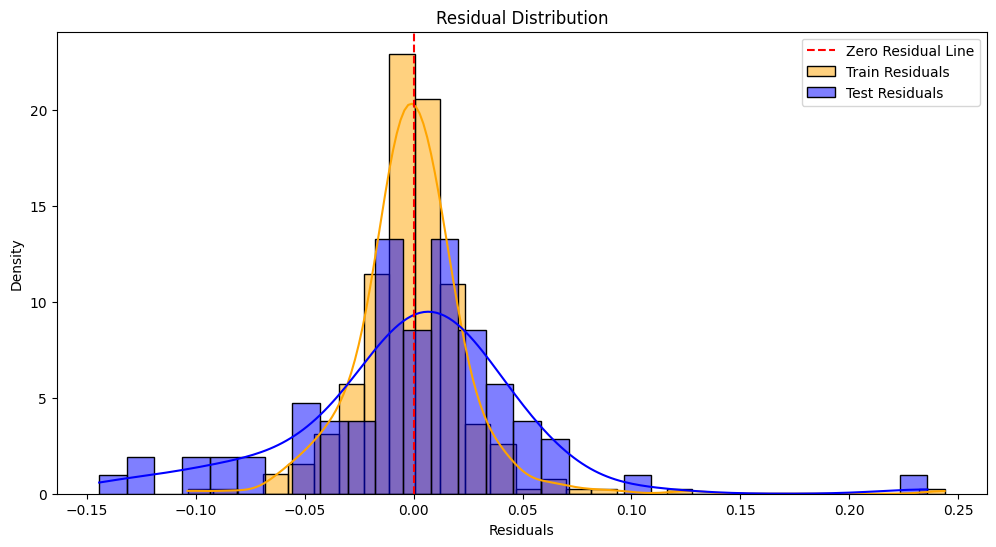

In [45]:
# Compute residuals
train_residuals = y_train - y_train_pred_rf
test_residuals = y_test - y_test_pred_rf

# Residual Analysis Plot
plt.figure(figsize=(12, 6))

# Residuals Distribution
sns.histplot(train_residuals, color="orange", label="Train Residuals", kde=True, stat="density", bins=30)
sns.histplot(test_residuals, color="blue", label="Test Residuals", kde=True, stat="density", bins=30)
plt.axvline(0, color="red", linestyle="--", label="Zero Residual Line")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.show()

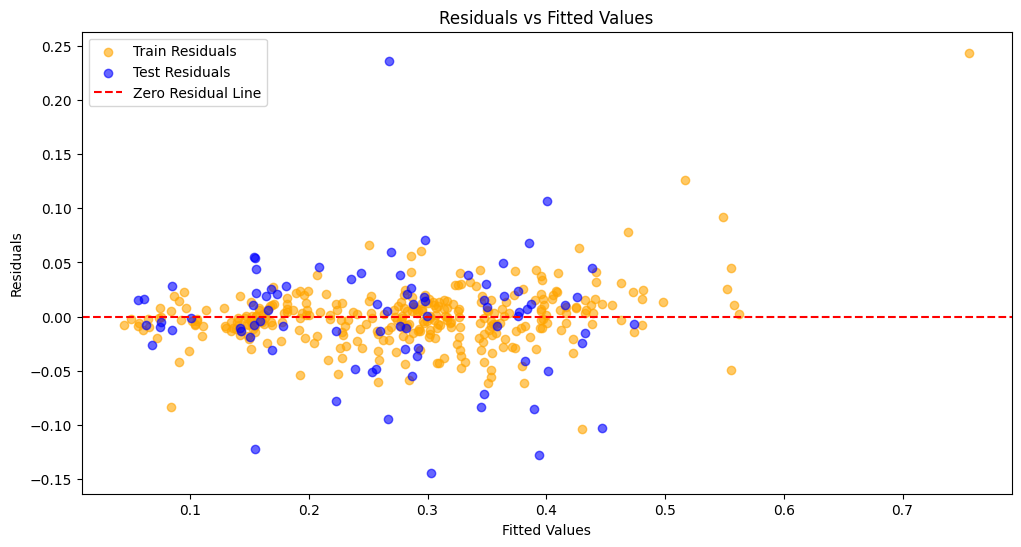

In [46]:
# Residuals vs Fitted Values Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_train_pred_rf, train_residuals, color="orange", alpha=0.6, label="Train Residuals")
plt.scatter(y_test_pred_rf, test_residuals, color="blue", alpha=0.6, label="Test Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Residual Line")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Prediction")
plt.legend()
plt.show()

## Conclusion

The goal of this project was to predict house prices based on key factors such as proximity to MRT stations, the number of nearby convenience stores, and latitude. <br>

* Model Comparison:
    * Linear Regression: Performed well as a baseline model with R-Squared of ~69.3% 
    * Random Forest Regression: Outperformed Linear Regression with an R-Squared of ~80.2%, demonstrating its ability to capture non-linear relationships effectively

* Key Insights:
    * Proximity to MRT stations and infrastructure (convenience stores) are strong determinants of house prices
    * Latitude is a key positive factor, highlighting urban clustering

* Scope and Limitations:
    * The model is well-suited for predicting house prices in datasets with similar features.
    * Limitations include dependency on the dataset's feature availability and reduced interpretability for larger datasets

## References

1. Real Estate Valuation Dataset:  
   Source: UCI Machine Learning Repository  
   [Dataset Link](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

2. Scikit-learn: Machine Learning in Python  
   Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.  
   [Scikit-learn Documentation](https://scikit-learn.org/stable/)

3. Seaborn: Statistical Data Visualization  
   Michael Waskom et al. (2020).  
   [Seaborn Documentation](https://seaborn.pydata.org/)

4. Random Forest Regression:  
   Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5-32.

5. Python Pandas Documentation:  
   McKinney, W. (2010). Data Structures for Statistical Computing in Python.  
   [Pandas Documentation](https://pandas.pydata.org/)

6. Visualization and EDA Techniques:  
   Waskom, M. L., et al. (2016). seaborn: statistical data visualization. Journal of Open Source Software, 1(1), 11.
